In [84]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [85]:
df = pd.read_csv('twitter_training.csv', encoding='latin1')
df.columns = ['index', 'entity', 'sentiment', 'message']

In [86]:
df.head()

,index,entity,sentiment,message
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   message    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [88]:
df.isnull().sum()

index          0
entity         0
sentiment      0
message      686
dtype: int64

#### Cleaning the Data and Handling the data

In [89]:
df['message'] = df['message'].astype(str).fillna('')

#### Sentiment analysis

In [90]:
def get_sentiment(message):
    return TextBlob(message).sentiment.polarity

# Apply the function to the text column
df['polarity'] = df['message'].apply(get_sentiment)

#### Visualize the sentiment patterns

C:\Users\Anaconda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


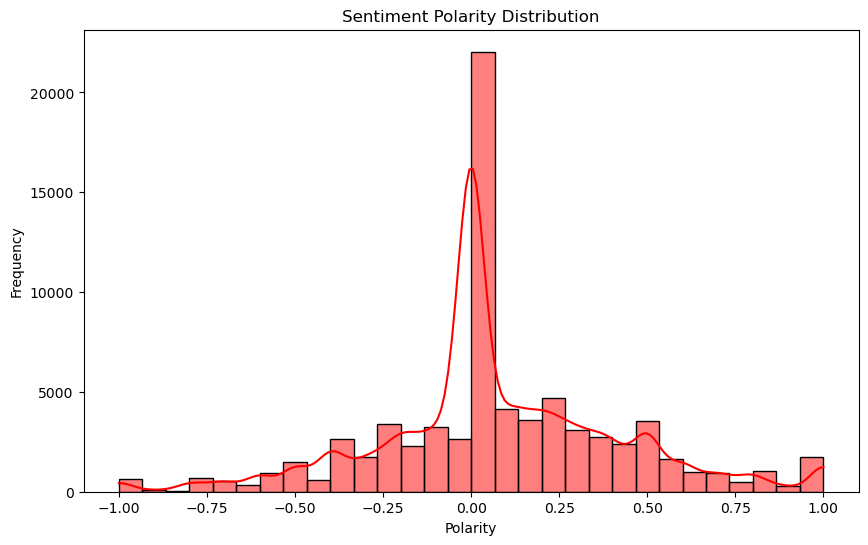

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], kde=True, bins=30,color='red')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

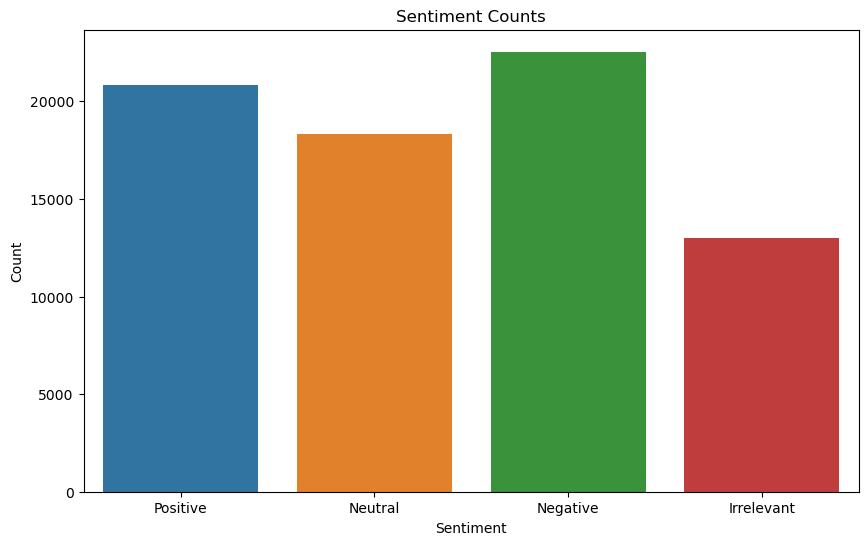

In [92]:
# Visualize sentiment counts
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

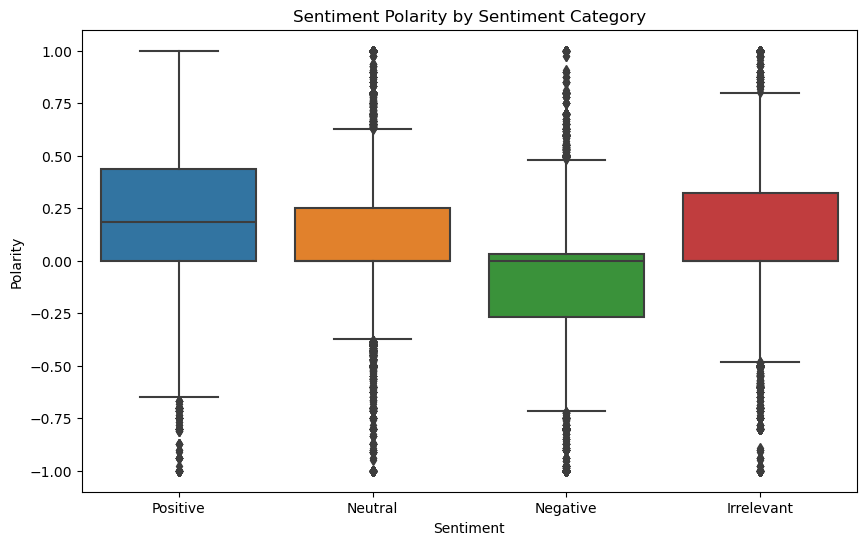

In [93]:
# Plot sentiment polarity by sentiment category
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='polarity', data=df)
plt.title('Sentiment Polarity by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Polarity')
plt.show()

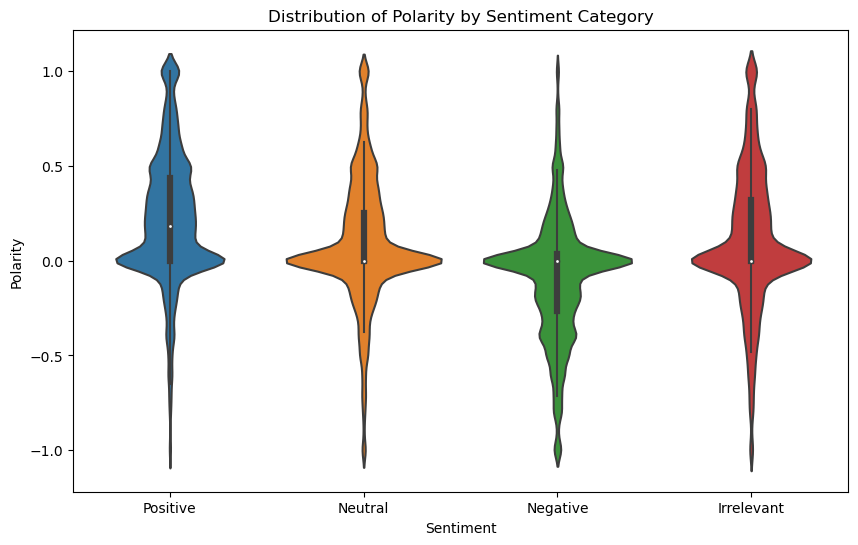

In [94]:
# Distribution of Polarity by Sentiment Category
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='polarity', data=df)
plt.title('Distribution of Polarity by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Polarity')
plt.show()

In [95]:
# Word Cloud for Positive and Negative Tweets
positive_messages = ' '.join(df[df['polarity'] > 0]['message'])
negative_messages = ' '.join(df[df['polarity'] < 0]['message'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_messages)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_messages)

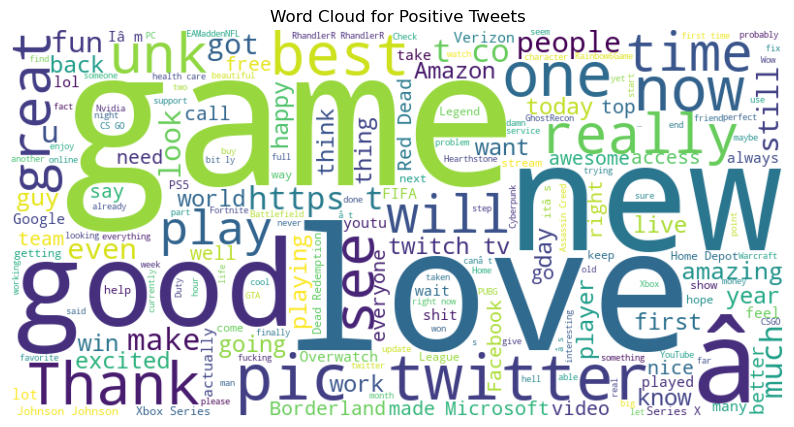

In [96]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

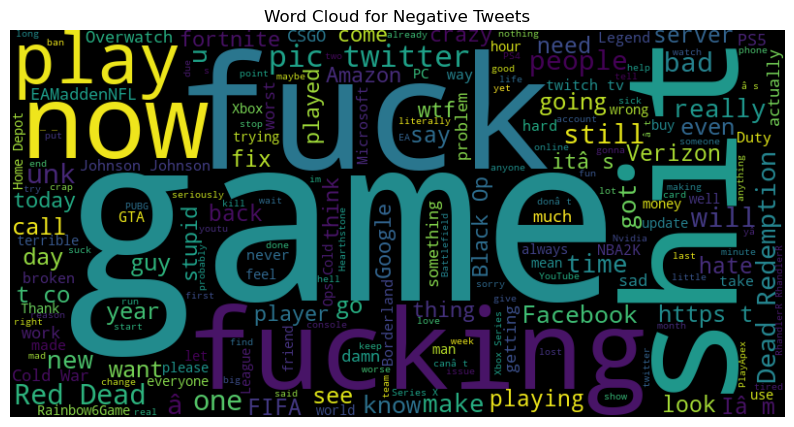

In [97]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()

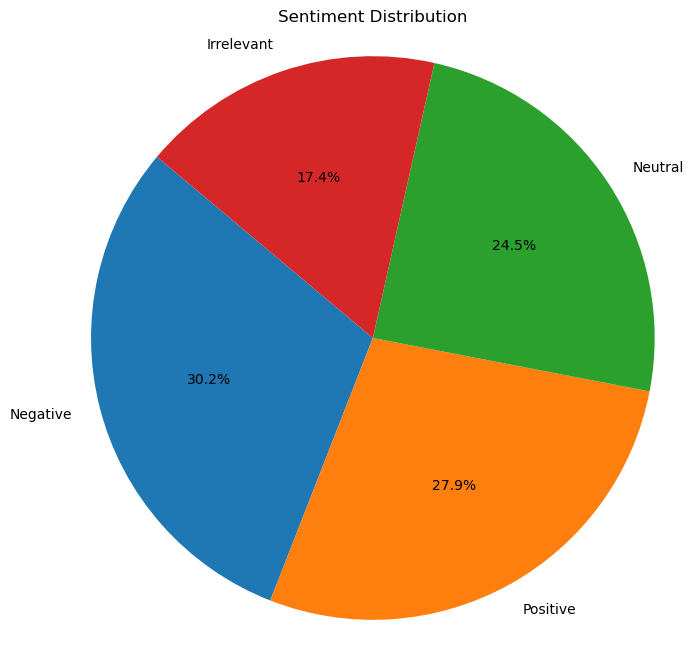

In [98]:
# Pie Chart of Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [100]:
most_positive = df.loc[df['polarity'].idxmax()]
most_negative = df.loc[df['polarity'].idxmin()]

print("Most Positive Message:")
print(f"Message: {most_positive['message']}")
print(f"Polarity: {most_positive['polarity']}")

print("\nMost Negative Message:")
print(f"Message: {most_negative['message']}")
print(f"Polarity: {most_negative['polarity']}")

Most Positive Message:
Message: Platinum is the best loot @Borderlands  
Polarity: 1.0

Most Negative Message:
Message: "What terrible bitch!"
Polarity: -1.0
